In [69]:
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://data.cityofnewyork.us/resource/pvqr-7yc4.csv'
urlretrieve(url, 'pvqr-7yc4.csv')

df = pd.read_csv('pvqr-7yc4.csv')

df.isnull().sum()


summons_number                          0
plate_id                                0
registration_state                      0
plate_type                              0
issue_date                              0
violation_code                          0
vehicle_body_type                      55
vehicle_make                           31
issuing_agency                          0
street_code1                            0
street_code2                            0
street_code3                            0
vehicle_expiration_date                 0
violation_location                     12
violation_precinct                      0
issuer_precinct                         0
issuer_code                             0
issuer_command                          0
issuer_squad                            0
violation_time                          0
time_first_observed                   907
violation_county                      114
violation_in_front_of_or_opposite     156
house_number                      

In [70]:
df.corr()

,summons_number,violation_code,street_code1,street_code2,street_code3,vehicle_expiration_date,violation_location,violation_precinct,issuer_precinct,issuer_code,...,law_section,violation_legal_code,unregistered_vehicle,vehicle_year,feet_from_curb,violation_post_code,violation_description,no_standing_or_stopping_violation,hydrant_violation,double_parking_violation
summons_number,1.000000,0.031965,-0.034420,-0.015201,-0.032222,0.043167,-0.062294,-0.061854,-0.129283,-0.134212,...,NaN,NaN,NaN,0.073394,-0.028062,NaN,NaN,NaN,NaN,NaN
violation_code,0.031965,1.000000,0.027223,0.070315,0.090942,0.047287,0.196595,0.186398,-0.024584,0.259200,...,NaN,NaN,NaN,0.061299,-0.027338,NaN,NaN,NaN,NaN,NaN
street_code1,-0.034420,0.027223,1.000000,0.336394,0.287240,-0.055870,0.050764,0.065490,0.041293,0.033453,...,NaN,NaN,NaN,-0.031102,-0.026614,NaN,NaN,NaN,NaN,NaN
street_code2,-0.015201,0.070315,0.336394,1.000000,0.473837,-0.023445,0.025748,0.040535,0.065818,0.159827,...,NaN,NaN,NaN,-0.048466,-0.046668,NaN,NaN,NaN,NaN,NaN
street_code3,-0.032222,0.090942,0.287240,0.473837,1.000000,0.043950,-0.033252,-0.021531,-0.028411,0.244938,...,NaN,NaN,NaN,0.005321,-0.013112,NaN,NaN,NaN,NaN,NaN
vehicle_expiration_date,0.043167,0.047287,-0.055870,-0.023445,0.043950,1.000000,0.156224,0.154144,0.035735,0.068286,...,NaN,NaN,NaN,0.555559,0.036358,NaN,NaN,NaN,NaN,NaN
violation_location,-0.062294,0.196595,0.050764,0.025748,-0.033252,0.156224,1.000000,1.000000,0.113905,0.121893,...,NaN,NaN,NaN,0.124639,-0.015680,NaN,NaN,NaN,NaN,NaN
violation_precinct,-0.061854,0.186398,0.065490,0.040535,-0.021531,0.154144,1.000000,1.000000,0.119183,0.108280,...,NaN,NaN,NaN,0.122797,-0.012476,NaN,NaN,NaN,NaN,NaN
issuer_precinct,-0.129283,-0.024584,0.041293,0.065818,-0.028411,0.035735,0.113905,0.119183,1.000000,-0.160752,...,NaN,NaN,NaN,0.014323,-0.017468,NaN,NaN,NaN,NaN,NaN
issuer_code,-0.134212,0.259200,0.033453,0.159827,0.244938,0.068286,0.121893,0.108280,-0.160752,1.000000,...,NaN,NaN,NaN,-0.016808,0.065445,NaN,NaN,NaN,NaN,NaN


In [71]:
df.drop(['issuer_squad', 'law_section', 'violation_legal_code','unregistered_vehicle','violation_post_code','violation_description'
       ,'no_standing_or_stopping_violation','hydrant_violation', 'double_parking_violation'], axis='columns', inplace=True)

df.dtypes

summons_number                         int64
plate_id                              object
registration_state                    object
plate_type                            object
issue_date                            object
violation_code                         int64
vehicle_body_type                     object
vehicle_make                          object
issuing_agency                        object
street_code1                           int64
street_code2                           int64
street_code3                           int64
vehicle_expiration_date              float64
violation_location                   float64
violation_precinct                     int64
issuer_precinct                        int64
issuer_code                            int64
issuer_command                        object
violation_time                        object
time_first_observed                   object
violation_county                      object
violation_in_front_of_or_opposite     object
house_numb

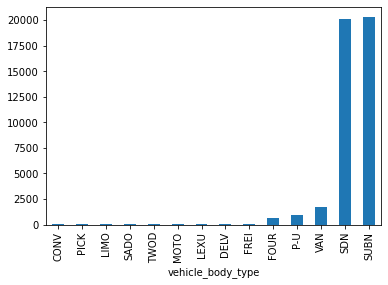

In [72]:
vehicle_violation = df.groupby(df.vehicle_body_type).violation_code.sum()
vehicle_violation.sort_values().plot(kind='bar')

plt.show()

In [73]:
print(df.groupby(['vehicle_make','vehicle_color']).violation_code.mean())

vehicle_make  vehicle_color
ACURA         BLACK            17.0
              BLK              60.8
              BLU              46.0
              BLUE             20.5
              GRAY             51.0
                               ... 
VOLVO         BR               99.0
              GY               21.0
              WH               20.0
              WHT              46.0
WINNE         BL               31.0
Name: violation_code, Length: 348, dtype: float64


In [74]:
print(df.vehicle_color.unique())
mapping = {'BLK': 'BLACK', 'GRAY':'GREY','GREY':'GREY', 'GY':'GREY', 'WHT':'WHITE','SILVE':'SILVER','BL':'BLUE','WT':'WHITE',
           'WH':'WHITE', 'GRY':'GREY', 'BRO':'BROWN', 'ORANG':'ORANGE', 'PURPL':'PURPLE', 'SLV':'SILVER', 'SIL':'SILVER',
           'ORG': 'ORANGE', 'SUILV':'SILVER','BRN':'BROWN','GR':'GREEN','RD':'RED','W':'WHITE', 'SILV':'SILVER',
           'R':'RED', 'G':'GREEN','WHI':'WHITE', 'BROW':'BROWN', 'GN':'GREEN', 'B':'BROWN','SI':'SILVER',
           'BKL':'BLACK', 'BN':'BROWN', 'SL':'SILVER','BR':'BROWN','YLLW':'YELLOW', 'nan':'nan', 'BLUE':'BLUE',
            'GL':'GL', 'TAN':'TAN', 'BEIGE':'BEIGE', 'GOLD':'GOLD', 'NAVY':'NAVY', 'BUR':'BUR', 'MAROO':'MAROO'
           
          }

['BLK' 'GRAY' nan 'BLUE' 'WHITE' 'RED' 'GY' 'WHT' 'BLACK' 'GL' 'SILVE'
 'GREY' 'BL' 'TAN' 'WT' 'WH' 'BLU' 'GRY' 'BRO' 'ORANG' 'PURPL' 'SLV' 'SIL'
 'ORG' 'SUILV' 'BEIGE' 'BRN' 'GREEN' 'BK' 'GR' 'GOLD' 'RD' 'W' 'NAVY'
 'SILV' 'R' 'G' 'WHI' 'BUR' 'BROW' 'GN' 'B' 'BROWN' 'SI' 'BKL' 'BN'
 'MAROO' 'SL' 'BR' 'YLLW']


In [75]:
df['vehicle_color']


0       BLK
1      GRAY
2      GRAY
3       NaN
4      BLUE
       ... 
995    GREY
996    GRAY
997     NaN
998     NaN
999     NaN
Name: vehicle_color, Length: 1000, dtype: object

In [76]:
df['vehicle_color'] = df.vehicle_color.map(mapping)
df['vehicle_color']

0      BLACK
1       GREY
2       GREY
3        NaN
4       BLUE
       ...  
995     GREY
996     GREY
997      NaN
998      NaN
999      NaN
Name: vehicle_color, Length: 1000, dtype: object